<a href="https://colab.research.google.com/github/Chandana2217/EliteTech-Intern/blob/main/TASK_1_Decision_Tree_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1:**



**DECISION TREE**
**IMPLEMANTATION**
**BUILD AND VISUALIZE A DECISION TREE**
**MODEL USING SCIKIT-LEARN TO CLASSIFY**
**OR PREDICT OUTCOMES ON A CHOSEN**
**DATASET**
**DELIVERABLE: A NOTEBOOK WITH MODEL**

**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

**Load Dataset**

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

print("Sample Data:")
print(df.head())

Sample Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


**Split Data into Training and Testing** **Sets**

In [ ]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

**Create and Train Decision Tree** **Model**

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

 **Make Predictions**

In [ ]:
y_pred = model.predict(X_test)

**Evaluate the Model**

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


**Confusion Matrix Visualization**

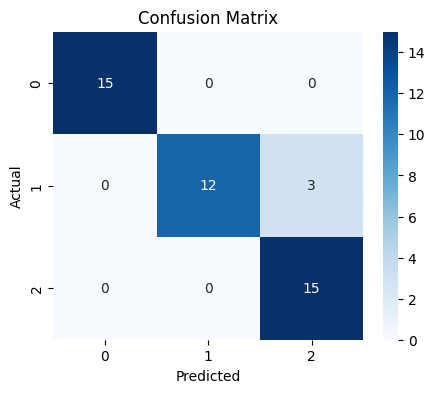

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Visualize the Decision Tree**

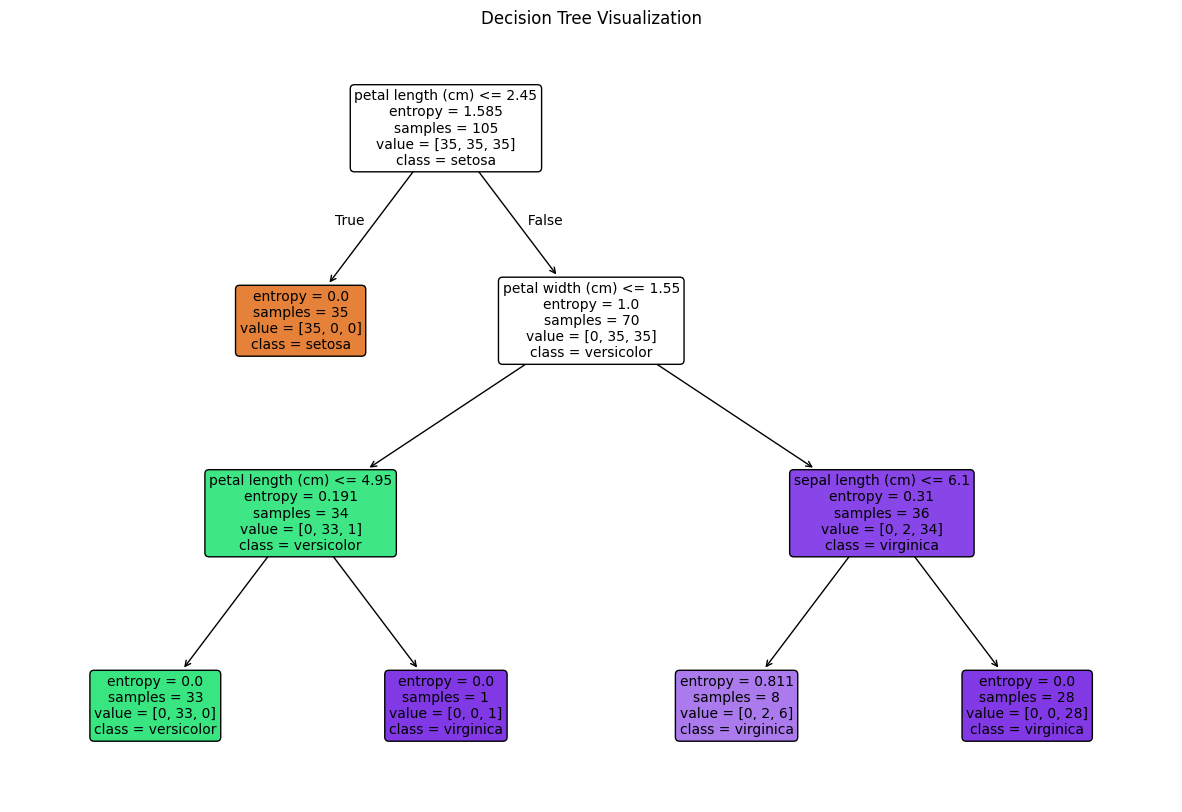

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

**Feature Importance**

/tmp/ipython-input-3521373814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


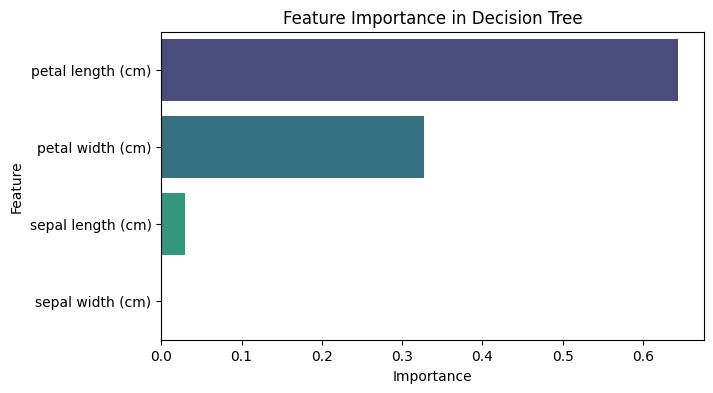

In [ ]:
importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.show()

 **Summary**

In [ ]:
print("\nModel Summary:")
print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Testing Accuracy: {model.score(X_test, y_test):.2f}")
print("\nMost important feature:", importance.iloc[0, 0])


Model Summary:
Training Accuracy: 0.98
Testing Accuracy: 0.93

Most important feature: petal length (cm)
